In [1]:
import json
import pandas as pd
import seaborn as sns
import collections
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# USA.gov Data from Bitly

In [1]:
path = 'datasets\\bitly_usagov\\example.txt'

In [8]:
f = open(path).readlines()
f[:3]

['{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n',
 '{ "a": "GoogleMaps\\/RochesterNY", "c": "US", "nk": 0, "tz": "America\\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\\/\\/www.AwareMap.com\\/", "u": "http:\\/\\/www.monroecounty.gov\\/etc\\/911\\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }\n',
 '{ "a": "Mozilla\\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident\\/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media

In [20]:
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [33]:
tz_dict = {}
for tz in records:
    if 'tz' in tz:
        if tz['tz'] in tz_dict:
            tz_dict[tz['tz']] += 1
        else:
            tz_dict[tz['tz']] = 1
tz_dict
tz_list = [(count,tz) for tz,count in tz_dict.items()]
tz_list.sort(reverse = True)
tz_list[:10]

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

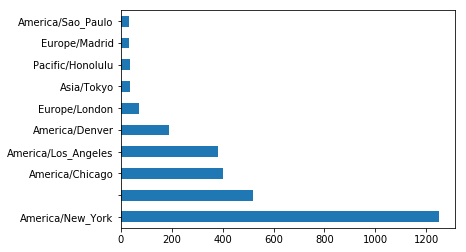

In [39]:
pd.Series([i[0] for i in tz_list[:10]],
          index = [i[1] for i in tz_list[:10]]).plot.barh()

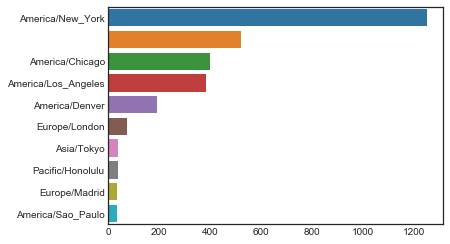

In [43]:
sns.set_style('white')
sns.barplot(y = [i[1] for i in tz_list[:10]],
            x = [i[0] for i in tz_list[:10]])

In [46]:
tz_dict = collections.defaultdict(int)
for tz in records:
    if 'tz' in tz:
        tz_dict[tz['tz']] += 1

tz_list = [(count,tz) for tz,count in tz_dict.items()]
tz_list.sort(reverse = True)
tz_list[:10]

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

In [49]:
tz_dict = {}
for tz in records:
    if 'tz' in tz:
        tz_dict[tz['tz']] = tz_dict.get(tz['tz'],0) + 1

tz_list = [(count,tz) for tz,count in tz_dict.items()]
tz_list.sort(reverse = True)
tz_list[:10]

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

In [50]:
df1 = pd.DataFrame(records)
df1

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 19 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
os             3440 non-null object
dtypes: float64(4), object(15)
memory usage: 528.5+ KB


In [64]:
tz_s = df1.tz.value_counts()[:10] #还有一个更简单的方法

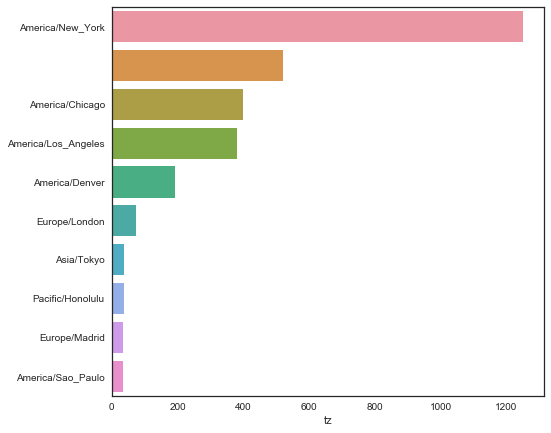

In [63]:
sns.set(style = 'white')
plt.figure(figsize = (8,6))
plt.subplots_adjust(left=0.2,right=0.95,
                    bottom=0.05, top=0.95)
sns.barplot(y = tz_s.index,x = tz_s)
plt.savefig('113.jpg')

In [67]:
df1['os'] = np.where(df1['a'].str.contains('Windows'),'Windows','No_Windowa')
# 以前我用的是下面的方法：

In [68]:
df1['os'] = df1.a.str.contains('Windows')
df1.loc[df1['os'] == True,'os'] = 'Windows'
df1.loc[df1['os'] == False,'os'] = 'No_Windows'

In [80]:
df2 = df1.groupby(['tz','os'],as_index = True).size() # 比count用起来要简单一些：
# df1.groupby(['tz','os']).count()[一行没有空值的列]

pandas.core.series.Series

In [86]:
df3 = df2.unstack('os').fillna(0)

In [122]:
indexer = np.argsort(-df3.sum(1))
df4 = df3.take(indexer)[:10] # 目的是根据tz的数量排序后取前十，并按是否是windows分类
df4

os,No_Windows,Windows
tz,,
America/New_York,339.0,912.0
,245.0,276.0
America/Chicago,115.0,285.0
America/Los_Angeles,130.0,252.0
America/Denver,132.0,59.0
Europe/London,43.0,31.0
Asia/Tokyo,2.0,35.0
Pacific/Honolulu,0.0,36.0
Europe/Madrid,16.0,19.0


In [93]:
df5 = df4.stack().reset_index()
df5

,tz,os,0
0,America/New_York,No_Windows,339.0
1,America/New_York,Windows,912.0
2,,No_Windows,245.0
3,,Windows,276.0
4,America/Chicago,No_Windows,115.0
5,America/Chicago,Windows,285.0
6,America/Los_Angeles,No_Windows,130.0
7,America/Los_Angeles,Windows,252.0
8,America/Denver,No_Windows,132.0
9,America/Denver,Windows,59.0


Text(0.5,0,'Number')

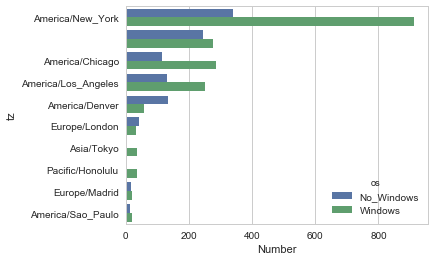

In [99]:
sns.set(style = 'whitegrid')
plt.subplots_adjust(left = 0.2)
sns.barplot(y = 'tz',x = 0,data = df5,hue = 'os')
plt.xlabel('Number')

In [123]:
# 画堆积柱状图
df4['total'] = df4.sum(1)
df4 = df4.reset_index()
df4

os,tz,No_Windows,Windows,total
0,America/New_York,339.0,912.0,1251.0
1,,245.0,276.0,521.0
2,America/Chicago,115.0,285.0,400.0
3,America/Los_Angeles,130.0,252.0,382.0
4,America/Denver,132.0,59.0,191.0
5,Europe/London,43.0,31.0,74.0
6,Asia/Tokyo,2.0,35.0,37.0
7,Pacific/Honolulu,0.0,36.0,36.0
8,Europe/Madrid,16.0,19.0,35.0
9,America/Sao_Paulo,13.0,20.0,33.0


Text(0.5,0,'Agent')

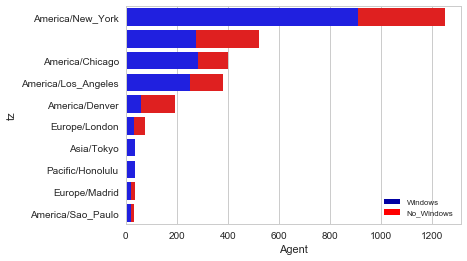

In [124]:
sns.barplot(y = df4.tz,x = df4.total, color = "red")
bottom_plot = sns.barplot(y = df4.tz, x = df4.Windows, color = "blue")

topbar = plt.Rectangle((0,0),1,0,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,0,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Windows', 'No_Windows'], 
               loc='lower right', ncol = 1, prop={'size':8})
l.draw_frame(False)
plt.xlabel('Agent')

In [130]:
df4.tz

0       America/New_York
1                       
2        America/Chicago
3    America/Los_Angeles
4         America/Denver
5          Europe/London
6             Asia/Tokyo
7       Pacific/Honolulu
8          Europe/Madrid
9      America/Sao_Paulo
Name: tz, dtype: object

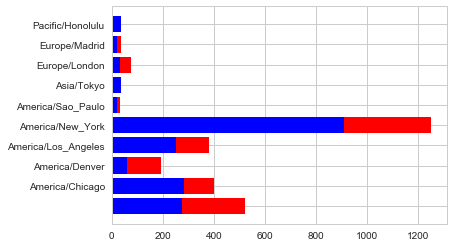

In [141]:
lower_bar = plt.barh(y = df4.tz,width = df4.Windows,color = 'blue')
higer_bar = plt.barh(y = df4.tz,width = df4.No_Windows,
                     left = df4.Windows,color = 'red',
                     )

# 如何才能让柱子按照从长到短的顺序排列呢？

In [157]:
def norm_total(group):
    group['normed'] = group[0] / group[0].sum()
    return group
    
df6 = df5.groupby('tz').apply(norm_total)
df6

,tz,os,0,normed
0,America/New_York,No_Windows,339.0,0.270983
1,America/New_York,Windows,912.0,0.729017
2,,No_Windows,245.0,0.470250
3,,Windows,276.0,0.529750
4,America/Chicago,No_Windows,115.0,0.287500
5,America/Chicago,Windows,285.0,0.712500
6,America/Los_Angeles,No_Windows,130.0,0.340314
7,America/Los_Angeles,Windows,252.0,0.659686
8,America/Denver,No_Windows,132.0,0.691099
9,America/Denver,Windows,59.0,0.308901


In [170]:
g = df5.groupby('tz')
g[0].transform('sum')
df6['normed'] = df5[0] / g[0].transform('sum')

In [171]:
df6

,tz,os,0,normed
0,America/New_York,No_Windows,339.0,0.270983
1,America/New_York,Windows,912.0,0.729017
2,,No_Windows,245.0,0.470250
3,,Windows,276.0,0.529750
4,America/Chicago,No_Windows,115.0,0.287500
5,America/Chicago,Windows,285.0,0.712500
6,America/Los_Angeles,No_Windows,130.0,0.340314
7,America/Los_Angeles,Windows,252.0,0.659686
8,America/Denver,No_Windows,132.0,0.691099
9,America/Denver,Windows,59.0,0.308901


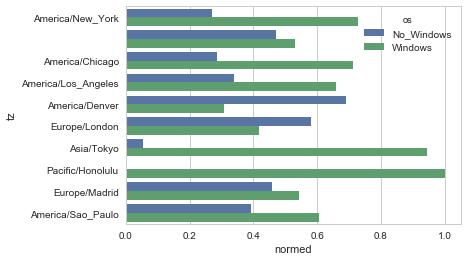

In [172]:
sns.barplot(y = 'tz',x = 'normed',hue = 'os',data = df6)

# MovieLens 1M Dataset

In [2]:
users = pd.read_table('datasets\\movielens\\users.dat',sep = '::',
                     header = None,engine = 'python',
                     names = ['user_id','gender','age','occupation','zip'])

In [179]:
users.head(8) # occupation 职业

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413


In [3]:
rating = pd.read_table('datasets\\movielens\\ratings.dat',
                       sep = '::',header = None,engine = 'python',
                       names = ['user_id','movie_id','rating','timestamp'])

In [182]:
rating.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movies = pd.read_table('datasets\\movielens\\movies.dat',
                       sep = '::',header = None,engine = 'python',
                       names = ['movie_id','title','genres'])

In [184]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df10 = users.merge(pd.merge(left = rating,right = movies,on = 'movie_id',
                            how = 'left'),on = 'user_id',how = 'right' )

In [188]:
df10.sample(5)

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
447627,2758,M,56,8,12436,377,4,973184999,Speed (1994),Action|Romance|Thriller
577541,3526,M,35,2,62263-3004,3725,3,967610952,American Pop (1981),Animation|Musical
559573,3437,F,25,0,37203,3911,4,973299243,Best in Show (2000),Comedy
762148,4526,M,25,20,10012,501,5,964808121,Naked (1993),Drama
593921,3618,M,56,17,22657,2313,4,966600563,"Elephant Man, The (1980)",Drama


In [187]:
df10.info() # 没有任何空值，merge的好

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [7]:
# 一部电影评分人数不能太少，否则分数没有意义,设定评分人数大于200，区分电影用：movie_id
r200 = df10.groupby('movie_id').count()['rating'] > 200

In [8]:
df10.index = df10['movie_id'] # 目的是：评分人数大于200的数据选择出来

In [9]:
df12 = df10.loc[r200.index,:] # loc时行索引是一一对应的

In [10]:
df10.index.name = 'movie'

In [11]:
df10

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
movie,,,,,,,,,,
1193,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
661,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
914,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3408,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
2355,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
1197,1,F,1,10,48067,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
1287,1,F,1,10,48067,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama
2804,1,F,1,10,48067,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama
594,1,F,1,10,48067,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical


In [12]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 1 to 3952
Data columns (total 10 columns):
user_id       1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [13]:
df_250 = df12.groupby(['movie_id','gender']).mean()['rating'].unstack('gender').sort_values(by='F',ascending = False)[:250]  
# 出现空值说明有些电影仅有一个性别的人看

E:\miniconda\envs\course_py35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'movie_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [14]:
df_250 = df_250.reset_index()

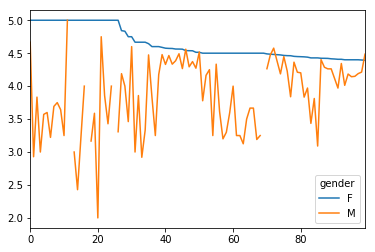

In [16]:
df_250[['F','M']][:100].plot() # 对于女性评出来的top250电影，男性给的分数一般要低与它

In [50]:
# 对于上面的脚本，还有简单的方法
df13 = df10.pivot_table('rating',index = 'title',columns = 'gender',
                        aggfunc = 'mean')
df13[:10]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [51]:
df14 = df13.sort_values(by = 'F',ascending = False)
df14[:10]

gender,F,M
title,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000
Lamerica (1994),5.0,4.666667
"Gambler, The (A J醫閗os) (1997)",5.0,3.166667
"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
Ayn Rand: A Sense of Life (1997),5.0,4.000000


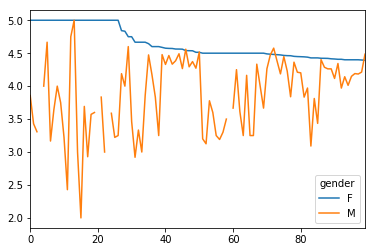

In [25]:
df14.reset_index()[['F','M']][:100].plot()

# 1880~2010年美国新生儿名字

## 准备数据

In [27]:
path = 'E:\\CMD_file\\00_ipynb\\04_Python_for_Data_Analysis\\datasets\\babynames\\yob1880.txt'

In [206]:
df20 = pd.read_csv(path,header = None,names = ['name','gender','number'])

In [33]:
df20.head(6)

,name,gender,number
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578


In [207]:
df_list = []
for year in range(1880,2011):
    path = 'datasets\\babynames\\yob{}.txt'.format(year)
    df = pd.read_csv(path,header = None,names = ['name','gender','number'])
    df['year'] = year
    df_list.append(df)

names = pd.concat(df_list,ignore_index = True)

In [38]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
gender    1690784 non-null object
number    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [208]:
names.sample(6)

,name,gender,number,year
1443082,Bode,M,60,2003
1004926,Cherisse,F,28,1987
1662696,Arika,F,23,2010
606325,Catarino,M,13,1962
1387563,Danyael,M,8,2001
802802,Isiah,M,57,1976


## 总出生人口和性别差异

In [46]:
df21 = names.groupby(['year','gender'],as_index = False).aggregate('sum')

In [52]:
df21.head(5)

,year,gender,number
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851


In [54]:
df22 = df21[df21['gender'] == 'F']
df22.index = df22['year']
df22.drop('year',axis = 1,inplace = True)

In [63]:
df23 = df21[df21['gender'] == 'M']
df23.index = df23['year']
df23.drop('year',axis = 1,inplace = True)

E:\miniconda\envs\course_py35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


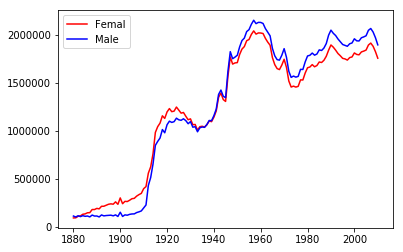

In [78]:
ax = plt.subplot(1,1,1)
line1, = ax.plot(df22['number'],color = 'red')
line2, = ax.plot(df23['number'],color = 'blue') # 出生潮变化及男女出生差异

plt.legend((line1, line2), ('Femal', 'Male'))

In [ ]:
# 上面的代码有简单的方法

In [67]:
df24 = names.pivot_table('number',columns = 'gender',index = 'year',aggfunc = 'sum')
df24.head(5)

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


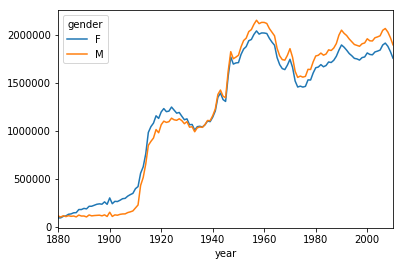

In [68]:
df24.plot()

## 对名字的偏好

In [80]:
# 每年将名字排名在前一千的男、女分别找出来，其它的名字丢弃掉
def get_top1000(group):
    return group.sort_values(by = 'number',ascending = False)[:1000]

In [209]:
names.head()

,name,gender,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [299]:
g = names.groupby(['year','gender'])
names['pct'] = names['number'] /  g['number'].transform('sum') 
# 每个名字在当年当性别中的比例
names.head()

,name,gender,number,year,pct,namel,name_gender
0,Mary,F,7065,1880,0.077643,mary,N
1,Anna,F,2604,1880,0.028618,anna,N
2,Emma,F,2003,1880,0.022013,emma,N
3,Elizabeth,F,1939,1880,0.021309,elizabeth,N
4,Minnie,F,1746,1880,0.019188,minnie,N


In [85]:
df24 = names.groupby(['year','gender'],as_index=False).apply(get_top1000)
df24.reset_index(inplace = True,drop = True)

In [92]:
df25 = df24.pivot_table('pct',index = 'year',columns = 'name',
                aggfunc = 'sum')

In [150]:
df25.fillna(0);

In [94]:
df26 = df25[['John','Harry','Mary','Marilyn']]

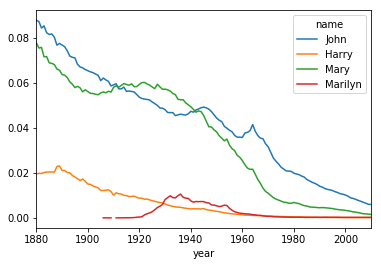

In [96]:
df26.plot(subplots = False) # 能够看的出来美国人对名字的偏好变化情况

In [98]:
df27 = df24.pivot_table('pct',index = 'year',columns = 'gender',aggfunc = 'sum')

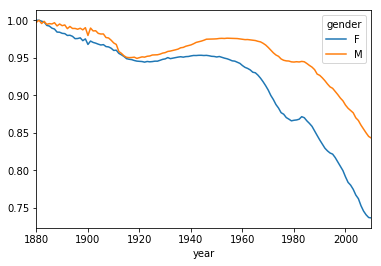

In [99]:
df27.plot() # 每年top1000所占的比例的变化情况，也能看出来美国人起名字也越来越分散

In [101]:
def get_pct(g,pct = 0.5):
    return g.sort_values(by = 'pct',ascending=False)['pct'].cumsum().values.searchsorted(pct)

In [106]:
df30 = names.groupby(['year','gender']).apply(get_pct)
df31 = df30.unstack('gender')

Text(0.5,1,'达到总人数50%所需名字的数量')

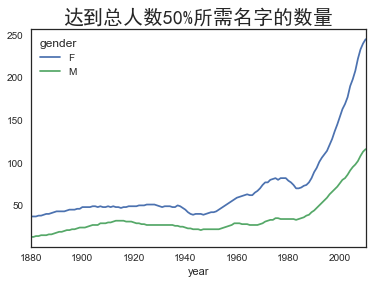

In [116]:
sns.set(style = 'white')
df31.plot()
plt.title('达到总人数50%所需名字的数量',fontproperties = 'Simhei',fontsize = 20)
# 说明美国人起名字越来越有个性

## 名字最后一个字母的变化

In [118]:
# 把名字最后一个字母取出来
names['last'] = names.name.str.extract(r'(.)$',expand=False)
# 这个方法比书上的简单的多了

In [171]:
# 书上的方法：
get_last = lambda x :x[-1]
# pd.DataFrame({'get_last':names.name.map(get_last),'last':names['last']})
# 不是到last是不是pd的一个属性，如果直接用names.last的不出来一列最后的字母
# 对于timeseries,last是一个非常简单的方法用于取出最后的日期
print(set(names.name.map(get_last) == names['last']))
pd.Series(np.arange(20),
    index = pd.date_range(start = '2018-5-10',periods = 20)).last('4D')


{True}


2018-05-26    16
2018-05-27    17
2018-05-28    18
2018-05-29    19
Freq: D, dtype: int32

In [119]:
names.sample(6)

,name,gender,number,year,pct,last
1056421,Cathlin,F,6,1989,0.000003,n
1600694,Meli,F,8,2008,0.000004,i
78623,Cleotilde,F,6,1907,0.000019,e
424241,Dyan,F,12,1946,0.000008,n
389859,Lowell,M,884,1942,0.000640,l
739202,Dione,M,11,1972,0.000007,e


In [144]:
df40 = names.pivot_table('pct',index = 'last',
                  columns = ['gender','year'],
                  aggfunc = 'sum')

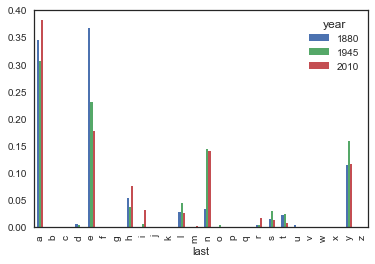

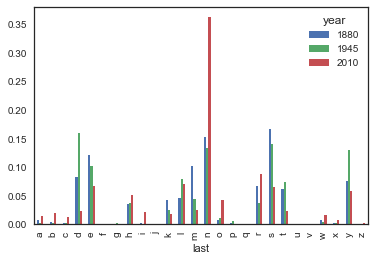

In [145]:
plt.figure(figsize = (12,8))
# ax1 = plt.subplot(211)
# ax2 = plt.subplot(212)

df40['F'][[1880,1945,2010]].plot(kind = 'bar')
df40['M'][[1880,1945,2010]].plot(kind = 'bar')

# 以e结尾的有明显的下降，其它变化不是非常大，接下来单独看看以e、n结尾的

In [147]:
df41 = names.pivot_table('pct',index = 'year',
                  columns = ['gender','last'],
                  aggfunc = 'sum')

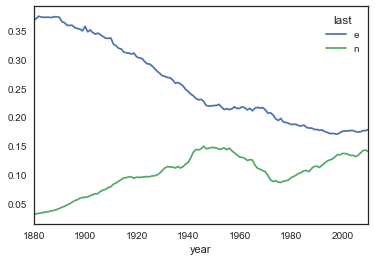

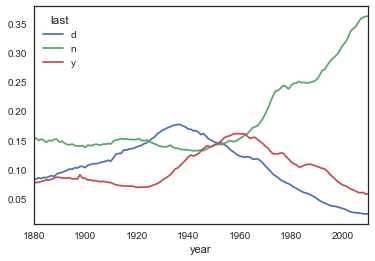

In [149]:
df41['F'][['e','n']].plot()
df41['M'][['d','n','y']].plot()

In [152]:
df24.head()

,name,gender,number,year,pct
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


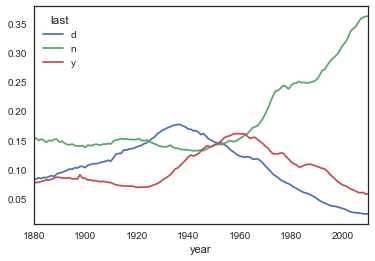

In [155]:
df40.loc[['d','n','y'],'M'].T.plot() # 和上面的方法是一样的！

## 男孩儿女孩儿都能用的名字

In [175]:
# 找到男女都能用的名字
df40 = df24.pivot_table('pct',index = 'year',columns = ['gender','name'],
                aggfunc = 'sum')
df40.head()

gender       F                                                             \
name   Aaliyah Aaron Abagail Abbey     Abbie Abbigail      Abby   Abigail   
year                                                                        
1880       NaN   NaN     NaN   NaN  0.000780      NaN  0.000066  0.000132   
1881       NaN   NaN     NaN   NaN  0.000881      NaN  0.000076  0.000087   
1882       NaN   NaN     NaN   NaN  0.000742      NaN  0.000102  0.000130   
1883       NaN   NaN     NaN   NaN  0.000703      NaN       NaN  0.000098   
1884       NaN   NaN     NaN   NaN  0.000760      NaN  0.000047  0.000101   

gender                     ...            M                                  \
name   Abigale Abigayle    ...          Zeb Zebulon Zechariah Zed      Zeke   
year                       ...                                                
1880       NaN      NaN    ...     0.000091     NaN       NaN NaN  0.000054   
1881       NaN      NaN    ...     0.000099     NaN       NaN NaN       NaN   
1882       NaN      NaN    ...     0.000088     NaN       NaN NaN       NaN   
1883       NaN      NaN    ...     0.000124     NaN       NaN NaN  0.000057   
1884       NaN      NaN    ...     0.000096     NaN       NaN NaN       NaN   

gender                                         
name   Zenas      Zeno Zigmund Zion    Zollie  
year                                           
1880     NaN       NaN     NaN  NaN       NaN  
1881     NaN       NaN     NaN  NaN       NaN  
1882     NaN       NaN     NaN  NaN       NaN  
1883     NaN  0.000057     NaN  NaN       NaN  
1884     NaN       NaN     NaN  NaN  0.000052  

[5 rows x 7551 columns]

In [216]:
neuter = set(names[names.gender == 'F'].name.str.lower()).intersection(set(names[names.gender == 'M'].name.str.lower()))

In [217]:
len(neuter) # 有9652个名字是男女都能用的
            # 如何在这9652个名字中找到最优代表性的：
            # 随着社会的发展，人们的认知变化，一个女性的名字渐渐变得中性
            # 就像Aaron这个名字肯定没有代表性，肯定不能把所有的图都画下来

9652

In [219]:
len(set(names[names.gender == 'F'].name.str.lower()).union(set(names[names.gender == 'M'].name.str.lower())))  

88496

In [ ]:
# 一共有88496个不同的名字。。。

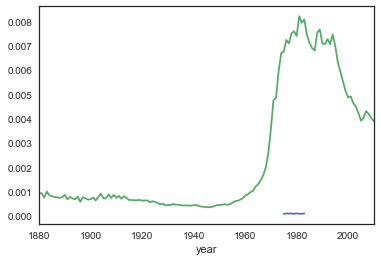

In [189]:
df40['F']['Aaron'].plot()
df40['M']['Aaron'].plot()

In [215]:
names['namel'] = names.name.str.lower()

In [220]:
names['name_gender'] = names.gender
names.loc[names.namel.isin(neuter),'name_gender'] = 'N'

In [223]:
names.loc[names.gender == 'F']

,name,gender,number,year,pct,namel,name_gender
0,Mary,F,7065,1880,0.077643,mary,N
1,Anna,F,2604,1880,0.028618,anna,N
2,Emma,F,2003,1880,0.022013,emma,N
3,Elizabeth,F,1939,1880,0.021309,elizabeth,N
4,Minnie,F,1746,1880,0.019188,minnie,N


In [224]:
print(7065 / 85843)
print(27 / 106651)

0.08230141071490978
0.00025316218319565686


In [237]:
df42 = names.pivot_table('number',index = 'year',columns=['gender','name_gender'],
                  aggfunc = 'sum')
df42.head()

gender          F             M        
name_gender     F       N     M       N
year                                   
1880         5150   85843  3842  106651
1881         4983   86972  3312   97436
1882         6094  101757  3858  109829
1883         6358  105964  3369  101263
1884         7689  121332  3796  110649

In [251]:
set(df42['F'].F + df42['F'].N.values == df21[df21.gender == 'F']['number'].values)

{True}

In [252]:
df42['ftotal'] = df42.F.F + df42.F.N

In [253]:
df42['mtotal'] = df42.M.M + df42.M.N

In [264]:
df42['ffpct'] = df42.F.F / df42['ftotal']
df42['fnpct'] = df42.F.N / df42['ftotal']
df42['mmpct'] = df42.M.M / df42['mtotal']
df42['mnpct'] = df42.M.N / df42['mtotal']

In [265]:
df42.head()

gender          F             M          ftotal  mtotal     ffpct     nfpct  \
name_gender     F       N     M       N                                       
year                                                                          
1880         5150   85843  3842  106651   90993  110493  0.056598  0.943402   
1881         4983   86972  3312   97436   91955  100748  0.054190  0.945810   
1882         6094  101757  3858  109829  107851  113687  0.056504  0.943496   
1883         6358  105964  3369  101263  112322  104632  0.056605  0.943395   
1884         7689  121332  3796  110649  129021  114445  0.059595  0.940405   

gender          mmpct     mnpct     fnpct  
name_gender                                
year                                       
1880         0.034771  0.965229  0.943402  
1881         0.032874  0.967126  0.945810  
1882         0.033935  0.966065  0.943496  
1883         0.032199  0.967801  0.943395  
1884         0.033169  0.966831  0.940405

In [275]:
# 应该有简单的做法，尝试一下：
df43 = names.pivot_table('pct',index = 'year',columns = ['gender','name_gender'],
                  aggfunc = 'sum').head()
df43

gender              F                   M          
name_gender         F         N         M         N
year                                               
1880         0.056598  0.943402  0.034771  0.965229
1881         0.054190  0.945810  0.032874  0.967126
1882         0.056504  0.943496  0.033935  0.966065
1883         0.056605  0.943395  0.032199  0.967801
1884         0.059595  0.940405  0.033169  0.966831

In [313]:
df44 = names.pivot_table('number',index = 'year',columns = ['gender','name_gender'],
                  aggfunc = 'sum')
df44.head()

gender          F             M        
name_gender     F       N     M       N
year                                   
1880         5150   85843  3842  106651
1881         4983   86972  3312   97436
1882         6094  101757  3858  109829
1883         6358  105964  3369  101263
1884         7689  121332  3796  110649

In [319]:
df45 = pd.merge(df44['F'].div(df44['F'].sum(1),axis = 0),df44['M'].div(df44['M'].sum(1),axis = 0),
        left_index = True,right_index = True,how = 'outer')  
df45.head()

name_gender,F,N_x,M,N_y
year,,,,
1880,0.056598,0.943402,0.034771,0.965229
1881,0.054190,0.945810,0.032874,0.967126
1882,0.056504,0.943496,0.033935,0.966065
1883,0.056605,0.943395,0.032199,0.967801
1884,0.059595,0.940405,0.033169,0.966831


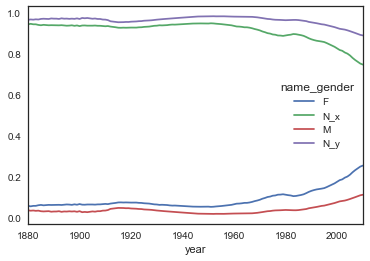

In [320]:
df45.plot()

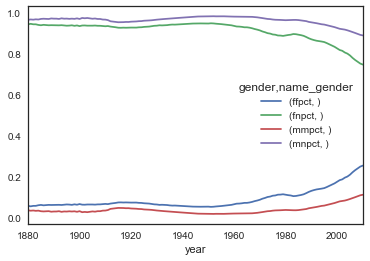

In [326]:
df42[['ffpct','fnpct','mmpct','mnpct']].plot(style={'ffpct':'r-',
                                                     'fnpct':'b-',
                                                     'mmpct':'k--',
                                                     'mnpct':'b--'})
# 整体情况是 人们使用中性名字所占的比例高
# 女性使用更加女性化的名字的人所占比例越来越多呢，
# 还是男性越来越来越不原意使用偏向女性的名字，致使这些名字变成了女性独有？
# 要解决这个问题只有去看词性了
# 男性变化不是很明显

## lesl名字词性的变化

In [285]:
s1 = pd.Series(df24.name.unique())
lesl_like = s1[s1.str.lower().str.contains('lesl')]

In [286]:
lesl_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [300]:
df50 = df24[df24.name.isin(lesl_like)].copy()
df50.head(6)

,name,gender,number,year,pct
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
4995,Leslie,M,122,1882,0.001073


In [302]:
df50.drop('pct',axis = 1,inplace = True)

In [304]:
g = df50.groupby(['year'])
df50['lesl_pct'] = df50['number'] / g['number'].transform('sum')
df50.head()

,name,gender,number,year,lesl_pct
632,Leslie,F,8,1880,0.091954
1108,Leslie,M,79,1880,0.908046
2462,Leslie,F,11,1881,0.106796
3014,Leslie,M,92,1881,0.893204
4512,Leslie,F,9,1882,0.065693


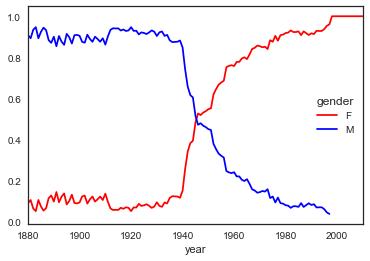

In [307]:
df50.groupby(['year','gender'])['lesl_pct'].sum().unstack('gender').plot(style = {'F':'r',"M":'b'})

In [ ]:
# lesl 这个名字是如何一步步变成女性的名字的
# 1940年发生了什么，让那些父母突然觉得lesl是一个男性化的名字

In [308]:
# 书上的方法  lesl_like这一步都一样
df50.groupby('name').number.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: number, dtype: int64

In [309]:
df51 = df50.pivot_table('number',index = 'year',columns = 'gender',
                aggfunc = 'sum')
df51.head()

gender,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [321]:
df52 = df51.div(df51.sum(1),axis = 0)
df52.head()
# 这个方法比pivot_table还要简单！因为省略了计算每个name占比

gender,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


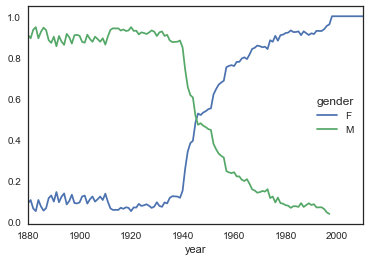

In [322]:
df52.plot()

# 美国食品数据

In [327]:
db = json.load(open('datasets\\usda_food\\database.json'))

In [331]:
db[0]

{'description': 'Cheese, caraway',
 'group': 'Dairy and Egg Products',
 'id': 1008,
 'manufacturer': '',
 'nutrients': [{'description': 'Protein',
   'group': 'Composition',
   'units': 'g',
   'value': 25.18},
  {'description': 'Total lipid (fat)',
   'group': 'Composition',
   'units': 'g',
   'value': 29.2},
  {'description': 'Carbohydrate, by difference',
   'group': 'Composition',
   'units': 'g',
   'value': 3.06},
  {'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 3.28},
  {'description': 'Energy',
   'group': 'Energy',
   'units': 'kcal',
   'value': 376.0},
  {'description': 'Water',
   'group': 'Composition',
   'units': 'g',
   'value': 39.28},
  {'description': 'Energy', 'group': 'Energy', 'units': 'kJ', 'value': 1573.0},
  {'description': 'Fiber, total dietary',
   'group': 'Composition',
   'units': 'g',
   'value': 0.0},
  {'description': 'Calcium, Ca',
   'group': 'Elements',
   'units': 'mg',
   'value': 673.0},
  {'description': 'Iron, Fe',
   'group': 

In [330]:
df60 = pd.DataFrame(db,columns = ['id','description','manufacturer','group']) 
print(len(df60))
df60.head() 

6636


,id,description,manufacturer,group
0,1008,"Cheese, caraway",,Dairy and Egg Products
1,1009,"Cheese, cheddar",,Dairy and Egg Products
2,1018,"Cheese, edam",,Dairy and Egg Products
3,1019,"Cheese, feta",,Dairy and Egg Products
4,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products


In [334]:
nlist = []
for i in db:
    nutrients = pd.DataFrame(i['nutrients'])
    nutrients['id'] = i['id']
    nlist.append(nutrients)

In [335]:
df61 = pd.concat(nlist,ignore_index = True)
df61.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [336]:
df62 = df61.merge(df60,on = 'id',how = 'outer')
df62.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389355 entries, 0 to 389354
Data columns (total 8 columns):
description_x    389355 non-null object
group_x          389355 non-null object
units            389355 non-null object
value            389355 non-null float64
id               389355 non-null int64
description_y    389355 non-null object
manufacturer     305162 non-null object
group_y          389355 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 26.7+ MB


In [355]:
df62.rename(columns = {'description_x':'nutrient',
                       'group_x':'nugroup'},
                      copy = False,inplace = True)

In [358]:
df62.head()

,nutrient,nugroup,units,value,id,description_y,manufacturer,group_y
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",,Dairy and Egg Products
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",,Dairy and Egg Products
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",,Dairy and Egg Products
3,Ash,Other,g,3.28,1008,"Cheese, caraway",,Dairy and Egg Products
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",,Dairy and Egg Products


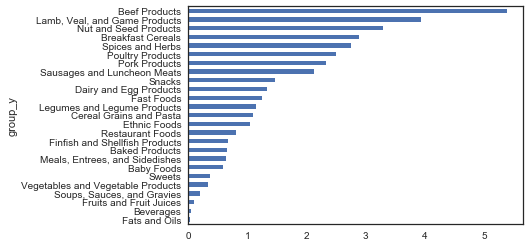

In [361]:
result = df62.groupby(['nutrient','group_y'])['value'].quantile(0.5) # quantile自动排序了
result['Zinc, Zn'].sort_values().plot(kind = 'barh')
# 锌含量排序(被排序的时相应group_y的value的中位数)

In [367]:
get_maximum = lambda x:x.loc[x['value'].idxmax()]

In [368]:
max_food = df62.groupby(['nutrient','group_y']).apply(get_maximum)[['value','group_y']]
max_food.head() # 最高含量

value  \
nutrient         group_y                                     
Adjusted Protein Sweets                             12.900   
                 Vegetables and Vegetable Products   2.180   
Alanine          Baby Foods                          0.911   
                 Baked Products                      2.320   
                 Beef Products                       2.254   

                                                                              group_y  
nutrient         group_y                                                               
Adjusted Protein Sweets                                                        Sweets  
                 Vegetables and Vegetable Products  Vegetables and Vegetable Products  
Alanine          Baby Foods                                                Baby Foods  
                 Baked Products                                        Baked Products  
                 Beef Products                                          Beef Products

# 2012年选举委员会数据

## 不同职业的人对两党的偏爱

In [369]:
df70 = pd.read_csv('datasets\\fec\\P00000001-ALL.csv')

E:\miniconda\envs\course_py35\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [370]:
df70.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [378]:
df70.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [371]:
df70.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [372]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [373]:
df70['party'] = df70.cand_nm.map(parties)

In [374]:
df70.groupby(by = 'party').size()

party
Democrat      593746
Republican    407985
dtype: int64

In [382]:
(df70['contb_receipt_amt'] > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [383]:
# 不同职业的人给两个政党的捐款差异情况
df70.contbr_occupation.value_counts() # 一共有45073种不同的职业

RETIRED                                   234829
INFORMATION REQUESTED                      35176
ATTORNEY                                   34409
HOMEMAKER                                  30199
PHYSICIAN                                  23530
INFORMATION REQUESTED PER BEST EFFORTS     21364
ENGINEER                                   14372
TEACHER                                    13998
CONSULTANT                                 13335
PROFESSOR                                  12565
NOT EMPLOYED                                9842
SALES                                       8357
LAWYER                                      8306
MANAGER                                     8060
PRESIDENT                                   7890
STUDENT                                     7086
OWNER                                       6422
EXECUTIVE                                   5623
SELF-EMPLOYED                               5517
WRITER                                      5137
CEO                 

In [384]:
df70.contbr_occupation = df70.contbr_occupation.replace(
    ['INFORMATION REQUESTED PER BEST EFFORTS',
     'INFORMATION REQUESTED',
     'INFORMATION REQUESTED (BEST EFFORTS)'],'NOT PROVIDED')
df70.contbr_occupation = df70.contbr_occupation.replace('C.E.O.','CEO')

In [389]:
# 找到捐款总额排名在前十的职业
top_10_occupation = df70.groupby('contbr_occupation').contb_receipt_amt.sum().sort_values(ascending=False)[:10].index  
top_10_occupation

Index(['RETIRED', 'NOT PROVIDED', 'ATTORNEY', 'HOMEMAKER', 'PHYSICIAN',
       'PRESIDENT', 'CEO', 'EXECUTIVE', 'CONSULTANT', 'LAWYER'],
      dtype='object', name='contbr_occupation')

In [391]:
df71 = df70.loc[df70.contbr_occupation.isin(top_10_occupation)].pivot_table('contb_receipt_amt',
                                                                    index = 'contbr_occupation',
                                                                    columns = 'party',
                                                                    aggfunc = 'sum')
df71

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7.343540e+06
CEO,2071474.79,3.932686e+06
CONSULTANT,2459812.71,2.472815e+06
EXECUTIVE,1355161.05,3.918557e+06
HOMEMAKER,4243394.30,1.324141e+07
LAWYER,3159391.87,3.785903e+05
NOT PROVIDED,4849801.96,2.007839e+07
PHYSICIAN,3732387.44,3.491657e+06
PRESIDENT,1878009.95,4.469834e+06


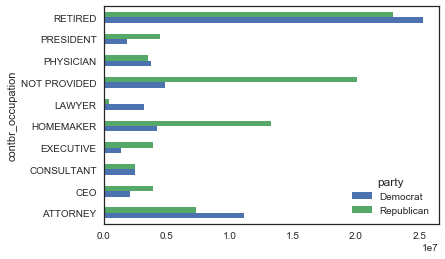

In [392]:
df71.plot(kind = 'barh') # 不同职业的人给两党捐款存在明显差异

## 不同收入阶层对候选人的偏爱

In [ ]:
# 给Obama, Romney捐款按照职业分类，求出每类(职业)的和，找出前十
df72 = df70[df70.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [397]:
def get_top_amt(group,key,n=5):
    totals = group.groupby(key).sum()['contb_receipt_amt']
    return totals.nlargest(n)

In [398]:
df72.groupby(['cand_nm']).apply(get_top_amt,'contbr_occupation')

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25270507.23
               ATTORNEY             11126932.97
               NOT PROVIDED          4849801.96
               HOMEMAKER             4243394.30
               PHYSICIAN             3732387.44
Romney, Mitt   RETIRED              11266949.23
               NOT PROVIDED         11173374.84
               HOMEMAKER             8037250.86
               ATTORNEY              5302578.82
               PRESIDENT             2403439.77
Name: contb_receipt_amt, dtype: float64

In [402]:
# 对nlargest的再解释
def get_top_amt2(group,key,n=5):
    return group.groupby(key).sum()['contb_receipt_amt'].sort_values(ascending=False)[:n]

In [409]:
df72.groupby(['cand_nm']).apply(get_top_amt2,'contbr_occupation').map(lambda x:format(x,',.2f'))

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25,270,507.23
               ATTORNEY             11,126,932.97
               NOT PROVIDED          4,849,801.96
               HOMEMAKER             4,243,394.30
               PHYSICIAN             3,732,387.44
Romney, Mitt   RETIRED              11,266,949.23
               NOT PROVIDED         11,173,374.84
               HOMEMAKER             8,037,250.86
               ATTORNEY              5,302,578.82
               PRESIDENT             2,403,439.77
Name: contb_receipt_amt, dtype: object

In [412]:
# 为什么会出现有人捐款和为负数呢？
df73 = df72.groupby('contbr_nm').sum()
df73 = df73.loc[df73.contb_receipt_amt > 0]
df73.head()

,contb_receipt_amt,file_num
contbr_nm,,
"A AYDELOTT, JUDITH",500.0,756218
"A'HARRAH, DIANA O.",650.0,1560175
"A'HEARN, DOLORES",325.0,3141079
A.A.L.F. CONSULTING L.L.C.,1000.0,771927
"AAB, RICHARD T. MR.",2500.0,760248


In [413]:
df74 = df72.loc[df72.contbr_nm.isin(df73.index)]
df74 # 捐款为正数的人

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
416,C00431171,P80003353,"Romney, Mitt","WILSON, ANDREW C. MR.",DPO,AE,9.87e+07,US DEPT OF STATE,FOREIGN SERVICE OFFICER,50.0,17-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
417,C00431171,P80003353,"Romney, Mitt","GRIFFIS, JOHN",APO,AE,9.128e+07,US ARMY,MILITARY OFFICER,250.0,20-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
418,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,09-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
419,C00431171,P80003353,"Romney, Mitt","GRIFFIS, JOHN",APO,AE,9.128e+07,US ARMY,MILITARY OFFICER,250.0,28-JAN-12,NaN,NaN,NaN,SA17A,771933,Republican
420,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE MR.",APO,AE,9.128e+07,US ARMY,ENGINEER,50.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican


In [416]:
bins = [0,1,10,100,1000,10 ** 4,10**5,10**6]
labels = pd.cut(df74.contb_receipt_amt,bins)

In [432]:
df75 = df74.groupby(['cand_nm',labels]).contb_receipt_amt.sum().unstack('cand_nm')
df75['Romney, Mitt'] = df75['Romney, Mitt'].fillna(0)

In [436]:
df76 = df75.div(df75.sum(1),axis=0)
df76

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.859551,0.140449
"(1, 10]",0.918877,0.081123
"(10, 100]",0.910691,0.089309
"(100, 1000]",0.709622,0.290378
"(1000, 10000]",0.446511,0.553489
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000


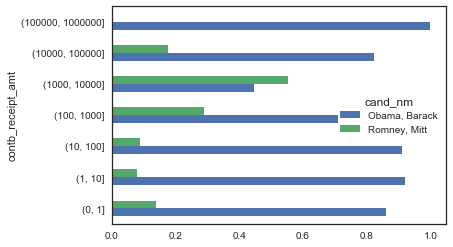

In [437]:
df76.plot(kind = 'barh') # 在小额捐助种，obama获得的较多
                         # 大多数穷人把钱捐给了obama

In [441]:
# 上面应该还有其它方法
df77 = df74.copy()
df77['pct'] = df74.contb_receipt_amt /  df74.groupby([labels]).contb_receipt_amt.transform('sum')  

In [443]:
df78 = df77.pivot_table('pct',index = labels,
                columns = 'cand_nm',aggfunc = 'sum')

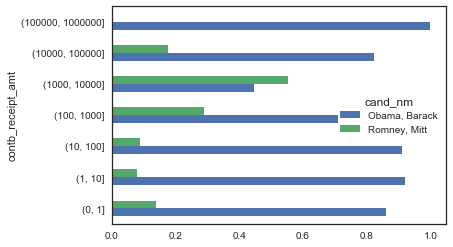

In [444]:
df78.plot(kind = 'barh') 

## 各州给obama的偏爱

In [445]:
g = df74.groupby(['cand_nm','contbr_st'])

In [449]:
# 捐款最多的前十个州是
df79 = df70.groupby('contbr_st').contb_receipt_amt.sum().nlargest(10)
df79

contbr_st
CA    4.311822e+07
TX    3.040551e+07
NY    2.744492e+07
IL    2.201179e+07
FL    2.090492e+07
MA    1.205440e+07
VA    9.788893e+06
PA    8.520263e+06
GA    7.727072e+06
NJ    7.686113e+06
Name: contb_receipt_amt, dtype: float64

In [452]:
df80 = g.contb_receipt_amt.sum().unstack('cand_nm').fillna(0)
df81 = df80.loc[df79.index]
df81

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
CA,23485188.91,11049226.98
TX,6477056.99,6045373.69
NY,14493390.74,9996950.75
IL,16359237.64,3454201.53
FL,7194464.96,8146957.37
MA,6589536.25,4604068.32
VA,4217210.69,3387087.49
PA,3664092.98,1881659.43
GA,2736595.24,1959731.59


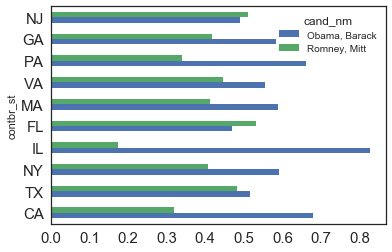

In [455]:
df81.div(df81.sum(1),axis = 0).plot(kind = 'barh',fontsize = 15)

In [456]:
# 各州人民对Obama的喜爱是有偏差的